Machine Learning Life Cycle

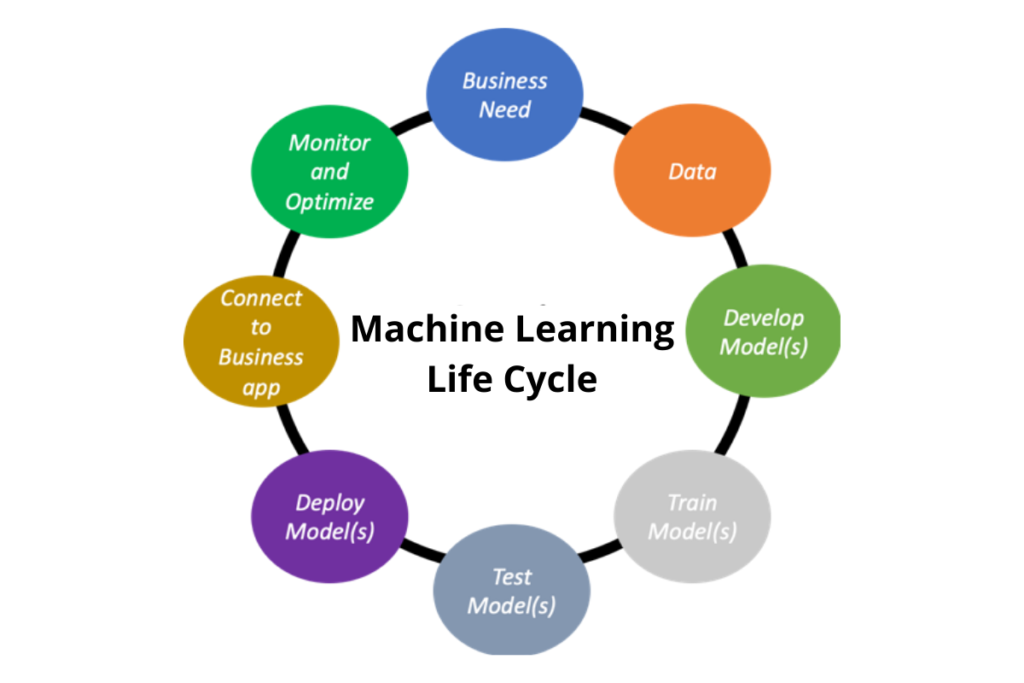

Step-by-step Process on Tesla Dataset

1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingesiton

In [4]:
# import all libraries Required

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
import sys

In [7]:
# Load Dataset
data = pd.read_csv('TSLA.CSV')

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [9]:
# Univarite Time series

In [10]:
stock_data = data[["Date","Close"]]

In [11]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [13]:
stock_data["Date"]= pd.to_datetime(stock_data['Date'])

C:\Users\vishn\AppData\Local\Temp\ipykernel_4440\3447639380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]= pd.to_datetime(stock_data['Date'])


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [15]:
# Converted Date from Object to Datetime

In [16]:
stock_data = stock_data.set_index("Date")

In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


# Why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [18]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# EDA

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [19]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


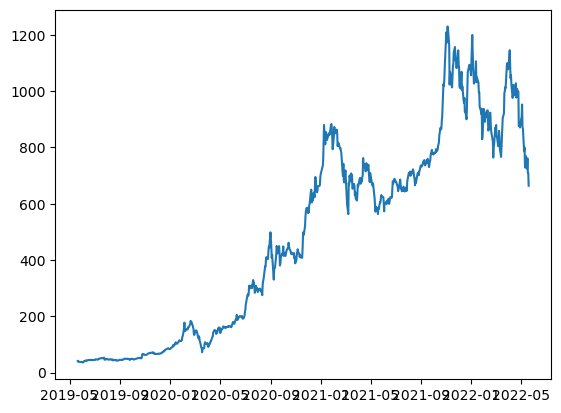

In [20]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

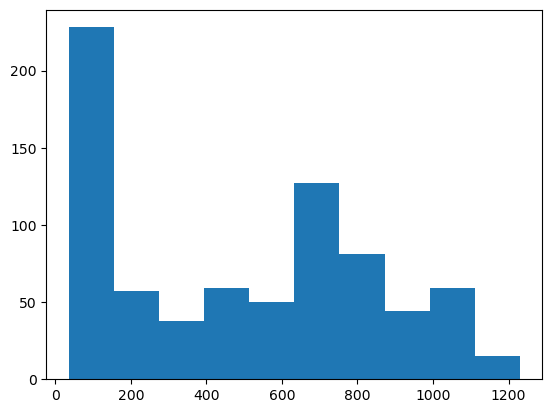

In [21]:
plt.hist(stock_data.Close)

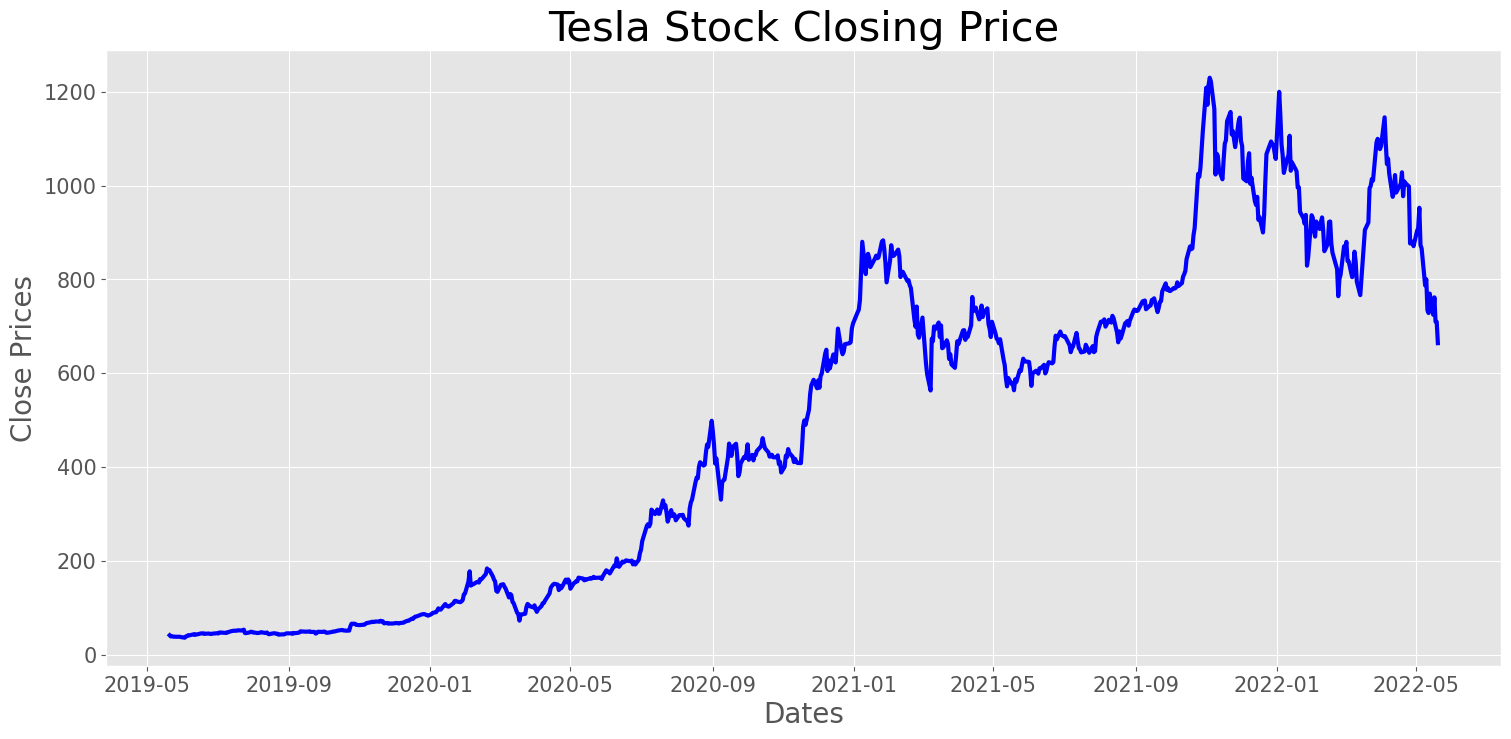

In [22]:
# Plotting Close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')
plt.title("Tesla Stock Closing Price",fontsize =30)
plt.show()

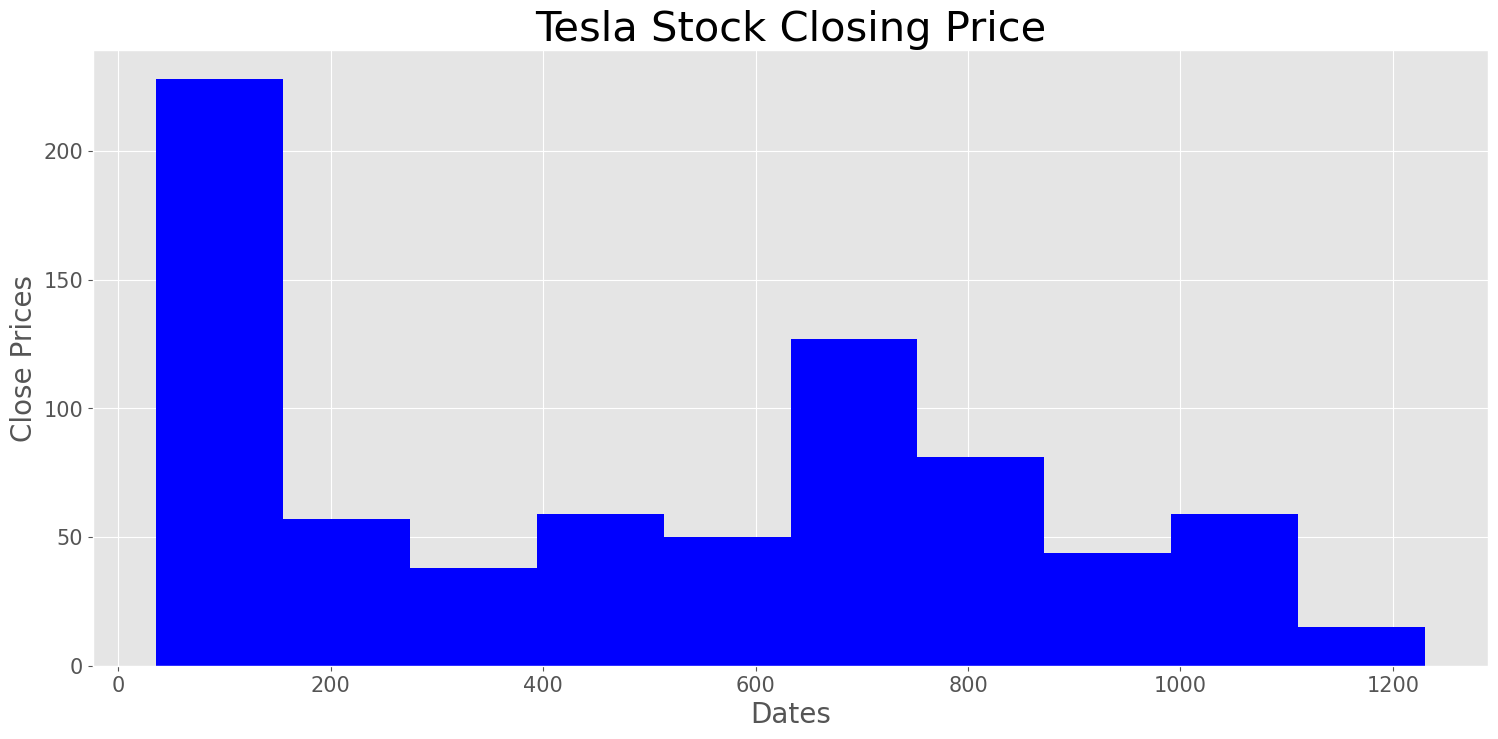

In [23]:
# Plotting Close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=3,color='blue')
plt.title("Tesla Stock Closing Price",fontsize =30)
plt.show()

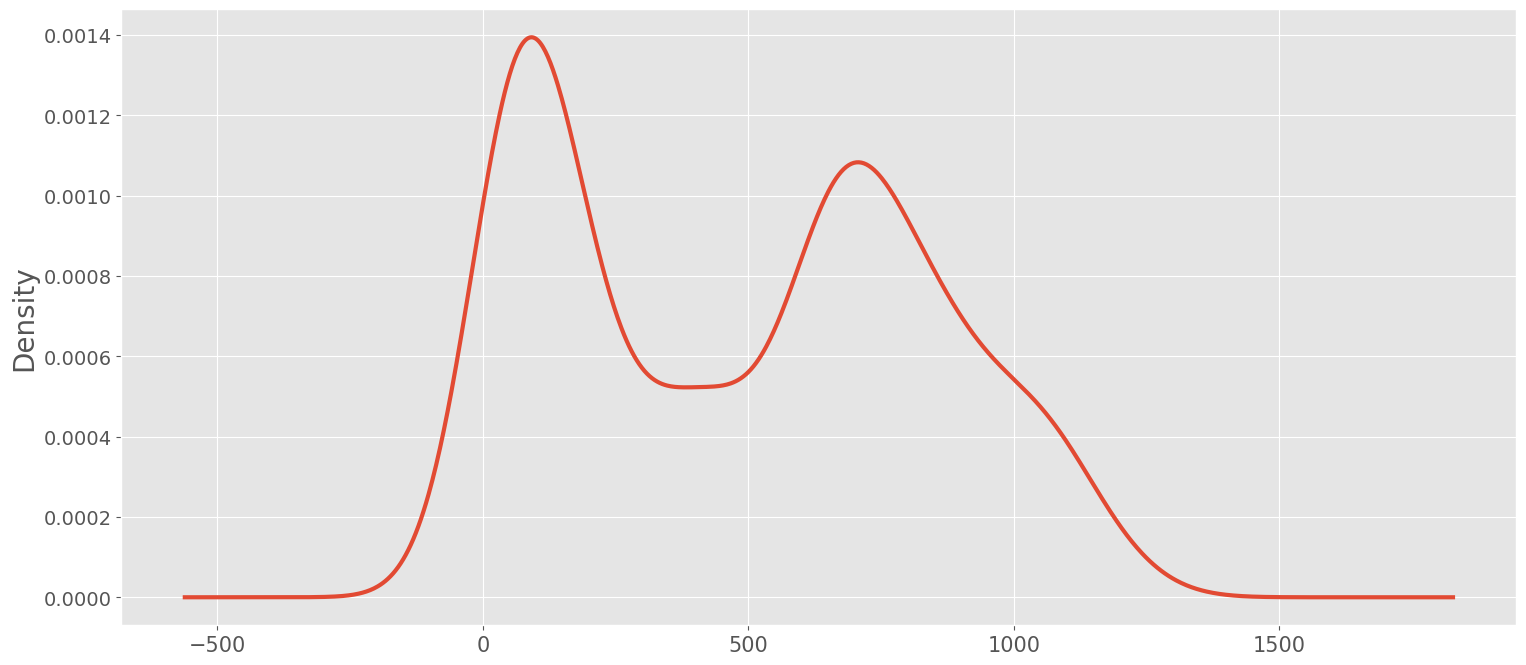

In [24]:
# Distribution of close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=14)
plt.show()

In [25]:
# Rolling Mean,Std

In [26]:
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [27]:
stock_data['Close'].rolling(12).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [28]:
rolmean = stock_data['Close'].rolling(12).mean()

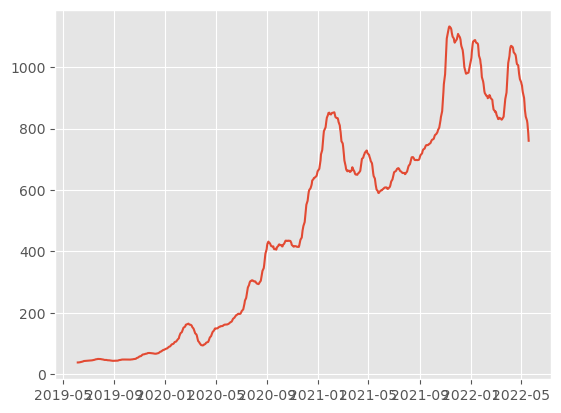

In [29]:
plt.plot(rolmean)

In [30]:
rolmean = stock_data['Close'].rolling(24).mean()

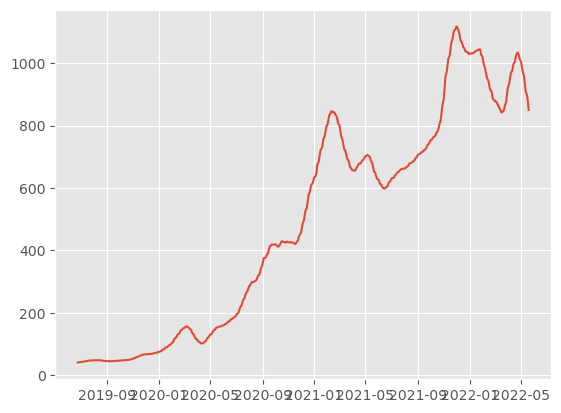

In [31]:
plt.plot(rolmean)

In [32]:
# We see as we increase Rolling time the graph is smooth

In [33]:
rolmean = stock_data['Close'].rolling(48).mean()

In [34]:
rolstd = stock_data['Close'].rolling(48).std()

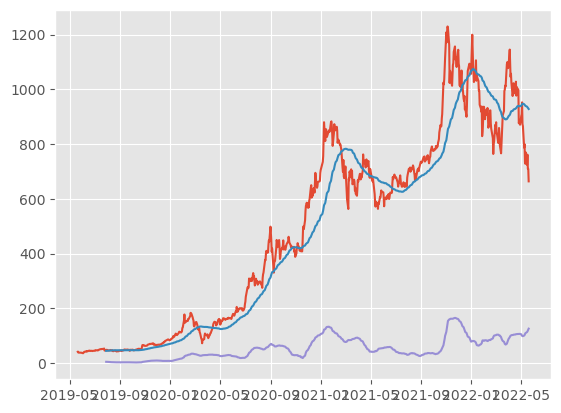

In [35]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [36]:
# Above is not Stationary Time Series

| Type                      | Description                                | Example                      |
| ------------------------- | ------------------------------------------ | ---------------------------- |
| **Univariate**            | One variable over time                     | Daily temperature            |
| **Multivariate**          | Multiple variables over time               | Stock OHLC + volume          |
| **Stationary**            | Constant mean and variance                 | Differenced time series      |
| **Non-Stationary**        | Changing mean/variance                     | Stock price trend            |
| **Seasonal**              | Repeating patterns                         | Weekly sales data            |
| **Cyclical**              | Irregular long-term patterns               | GDP growth cycles            |
| **Noisy / Irregular**     | High randomness                            | Error log data               |
| **Real-time / Streaming** | Live data that flows continuously          | IoT sensors, financial ticks |
| **Panel (Cross-section)** | Time series from multiple sources/entities | Multiple companies’ stocks   |


| **#** | **Type of Time Series**           | **Description**                                     | **Common Tests / Analysis Techniques**                             |
| ----: | --------------------------------- | --------------------------------------------------- | ------------------------------------------------------------------ |
|   1️⃣ | **Univariate Time Series**        | Single variable measured over time                  | ADF Test, KPSS, ARIMA, Rolling Stats, STL Decomposition            |
|   2️⃣ | **Multivariate Time Series**      | Multiple time-dependent variables                   | Granger Causality Test, VAR, Cointegration Test, Cross-Correlation |
|   3️⃣ | **Stationary Time Series**        | Mean and variance do not change over time           | ADF Test (confirm stationarity), Plot ACF/PACF                     |
|   4️⃣ | **Non-Stationary Time Series**    | Mean/variance change over time (trend, drift)       | ADF Test (fails), KPSS, Differencing, Detrending                   |
|   5️⃣ | **Seasonal Time Series**          | Repeating patterns at regular intervals             | STL Decomposition, Seasonal Differencing, Fourier Analysis, ACF    |
|   6️⃣ | **Cyclical Time Series**          | Long-term irregular fluctuations (e.g. economy)     | Trend-Cycle Decomposition, Hodrick-Prescott Filter                 |
|   7️⃣ | **Irregular / Noisy Series**      | No clear pattern; high randomness                   | Smoothing (EMA, Rolling Mean), Outlier Detection (Z-Score, IQR)    |
|   8️⃣ | **Real-Time / Streaming Series**  | Data comes in continuously (IoT, financial tickers) | Online Learning, Drift Detection, Real-Time Anomaly Detection      |
|   9️⃣ | **Panel Time Series**             | Multiple entities each with their own time series   | Panel Stationarity Test, Pooled Regression, Multilevel Time Models |
|    🔟 | **Interval / Gapped Time Series** | Time intervals are irregular or missing             | Interpolation, Forward Fill, Resampling, Gap Detection             |


In [37]:
# ADF (Ada Fullar Test)

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
adft = adfuller(stock_data['Close'])

In [40]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [41]:
pd.Series(adft[0:4],index=["test Stats","p-value","lag","data point"])

test Stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [42]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

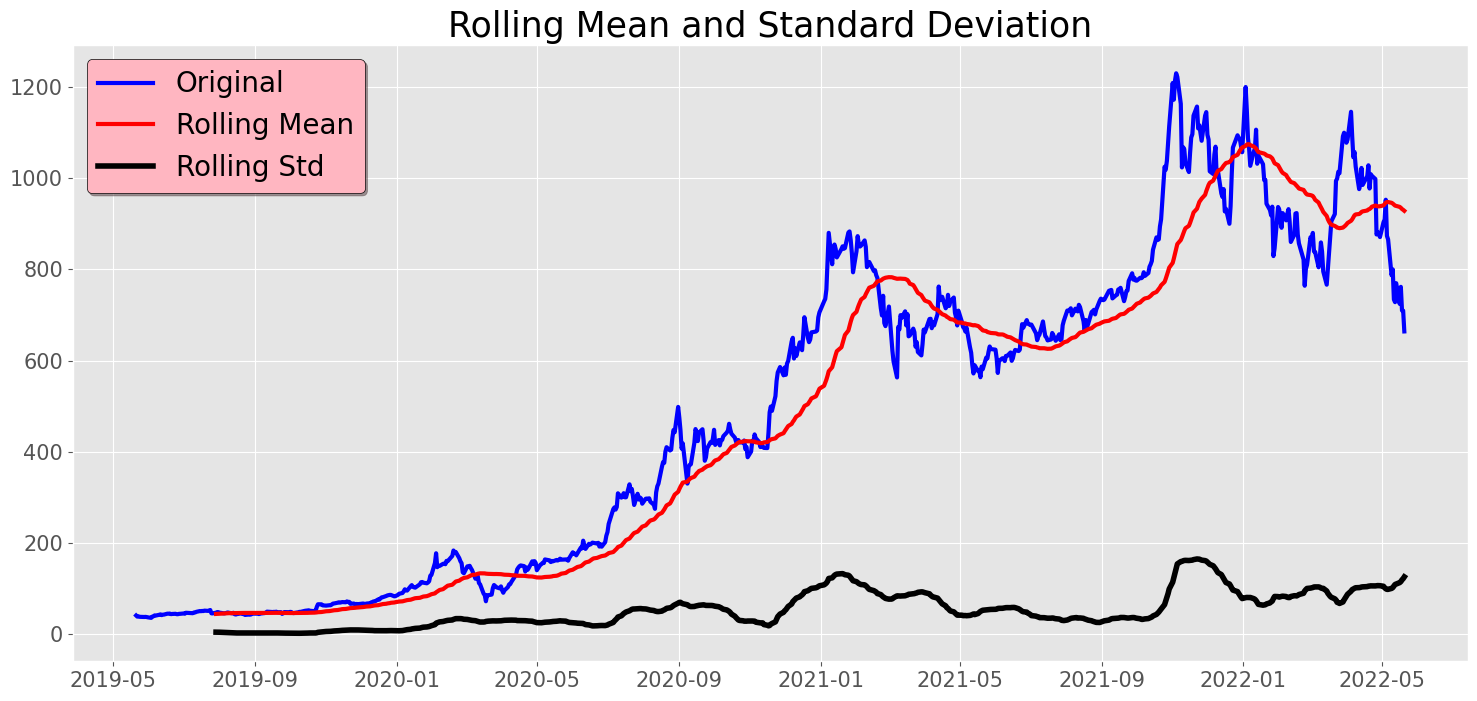

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [43]:
test_stationarity(stock_data.Close)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [45]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

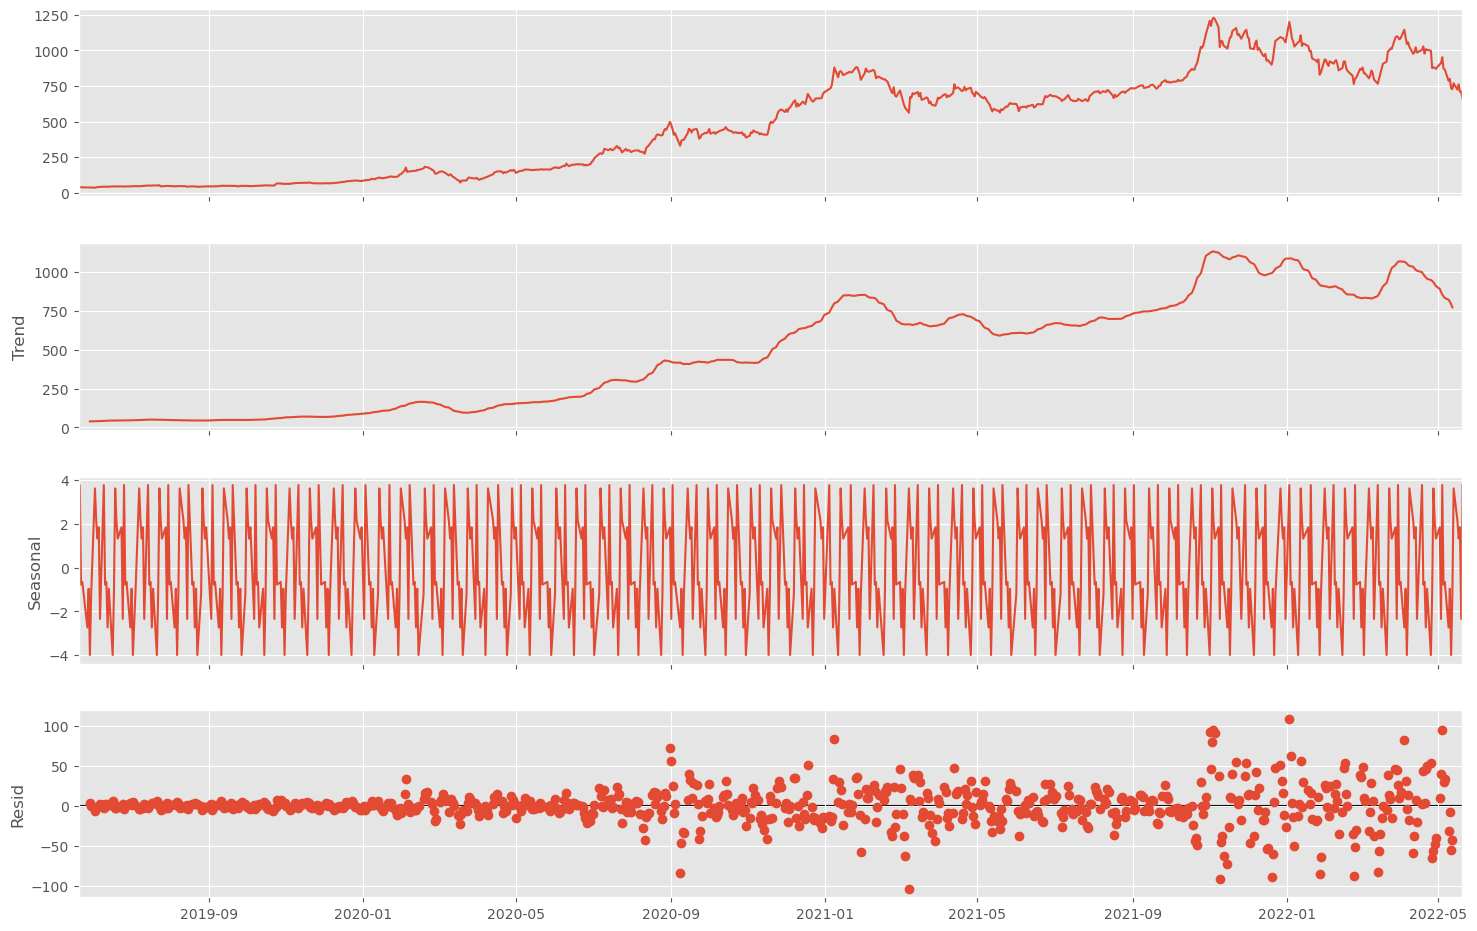

In [46]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

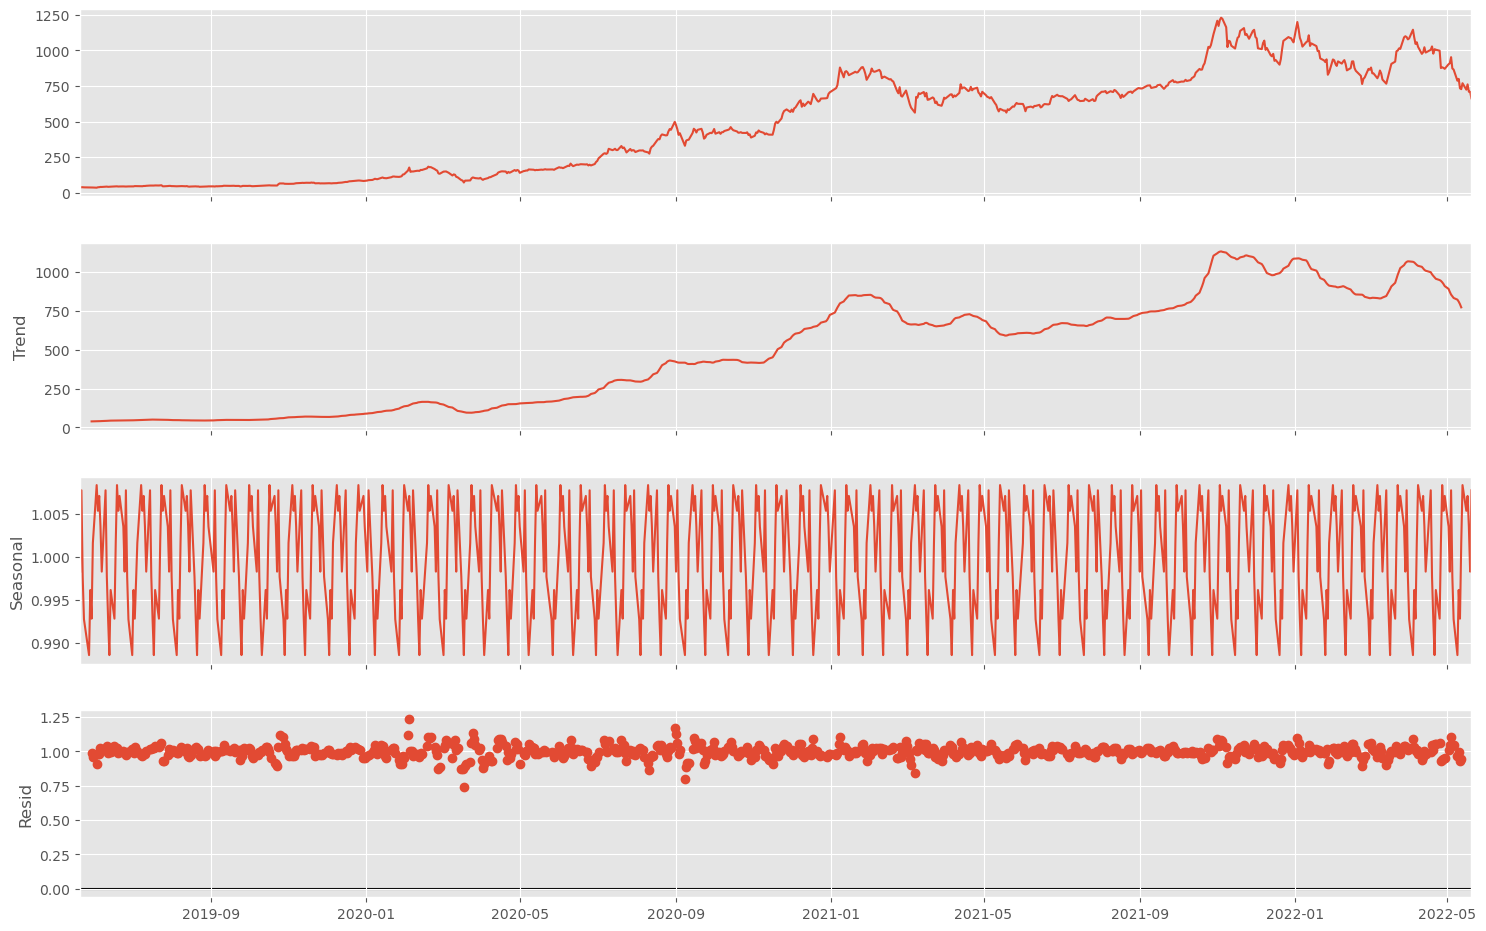

In [48]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

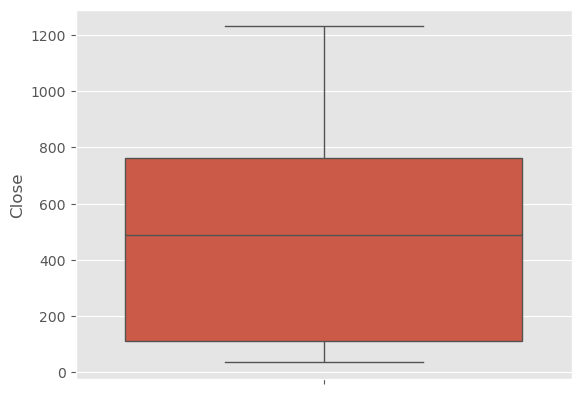

In [49]:
sns.boxplot(stock_data.Close)

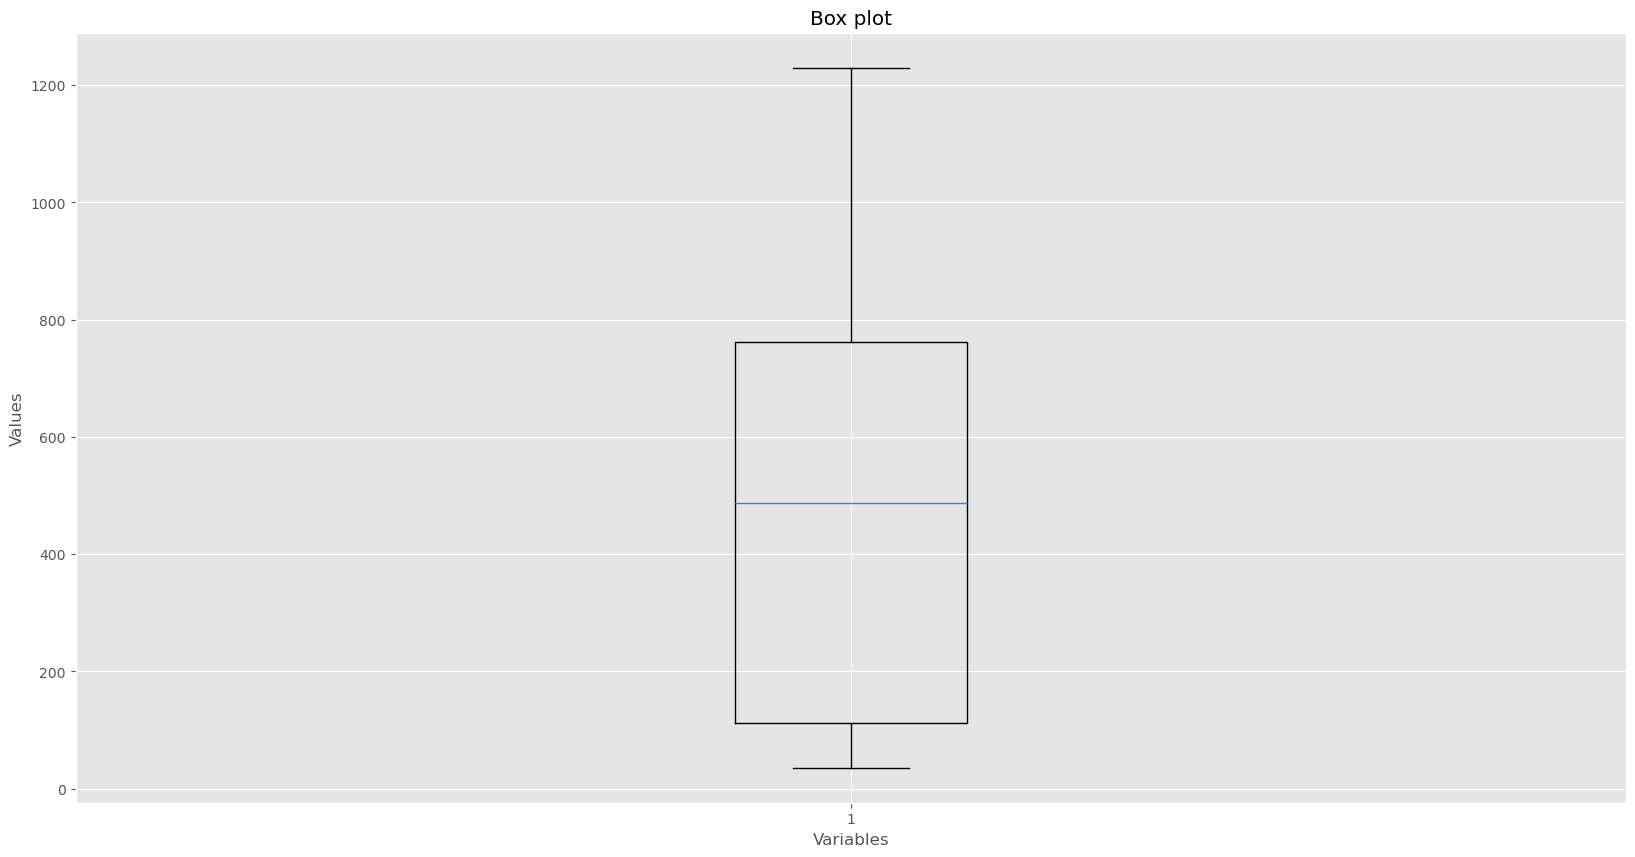

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(stock_data['Close'])
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Box plot')
plt.show()

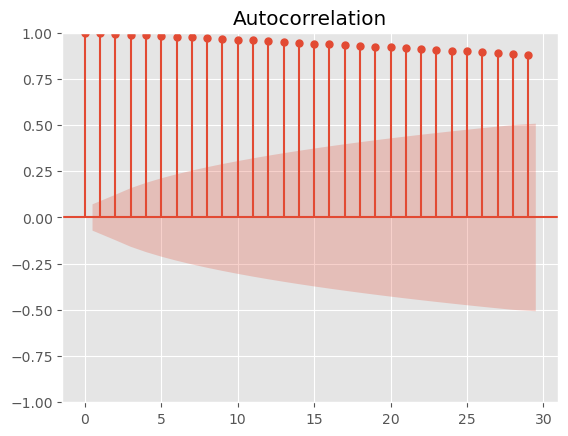

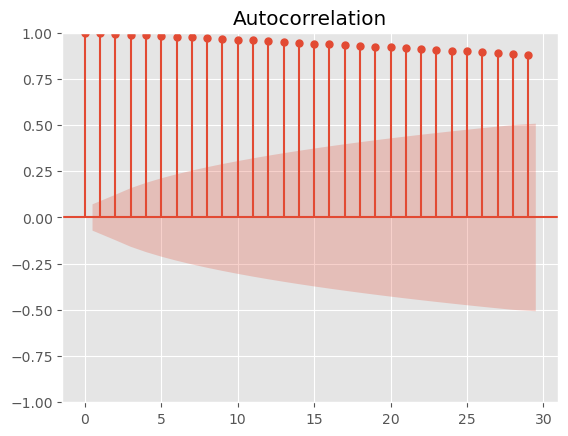

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)

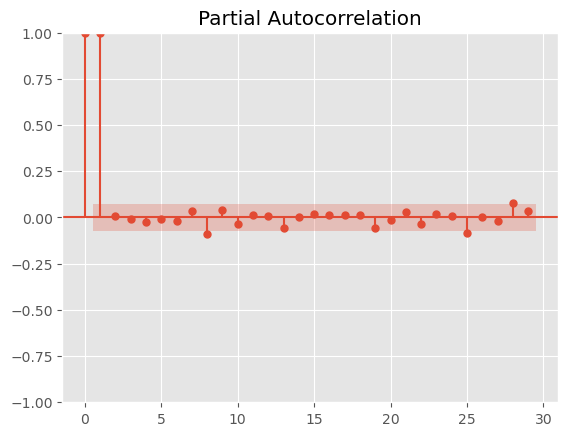

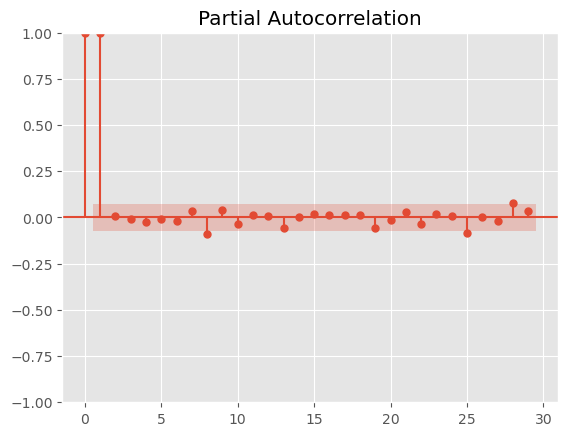

In [52]:
plot_pacf(stock_data.Close)

## Preprocessing of the data
1. fill the missing
2. convert data Into the stationary time series
3. If necessary then normalize the data
4. Split the data into train and test
5. Clean the data by removing the outliers

In [53]:
df_close = stock_data['Close']

In [54]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

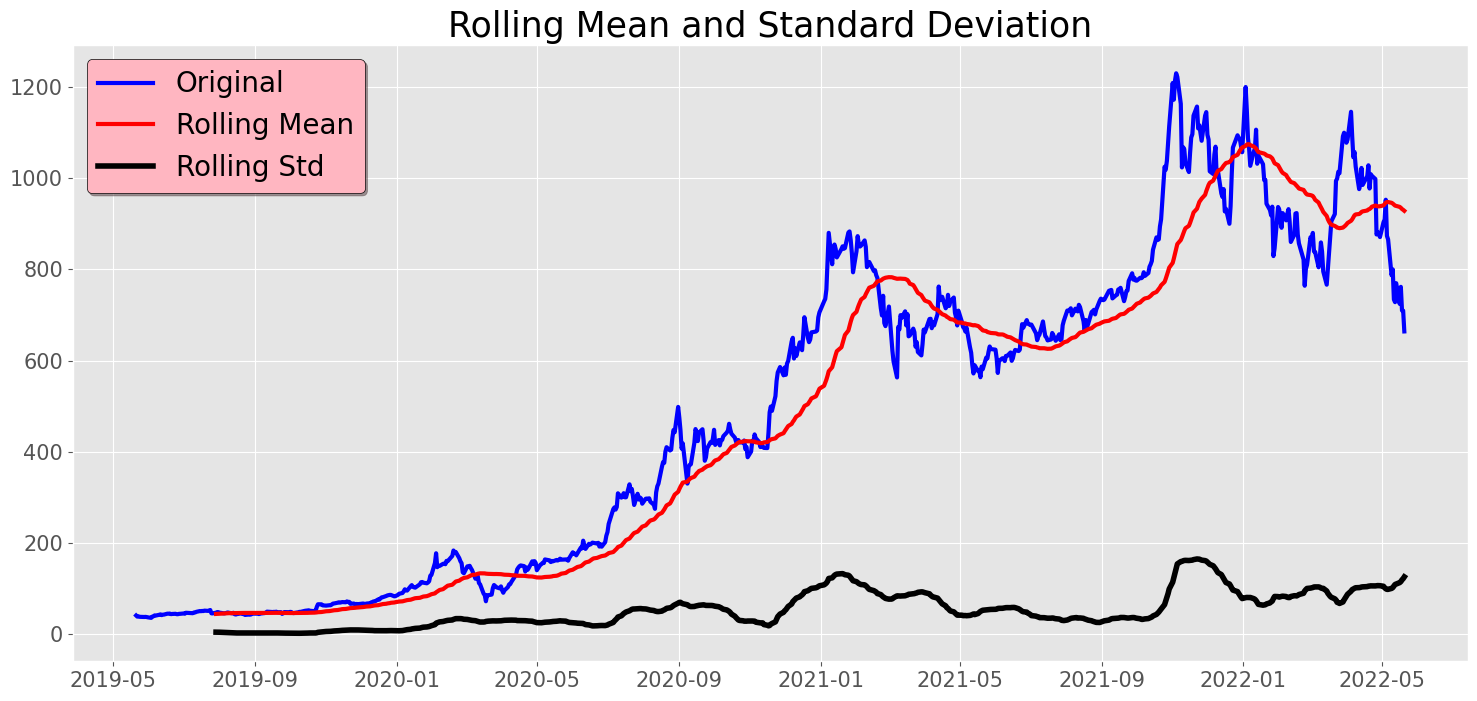

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [58]:
test_stationarity(df_close)

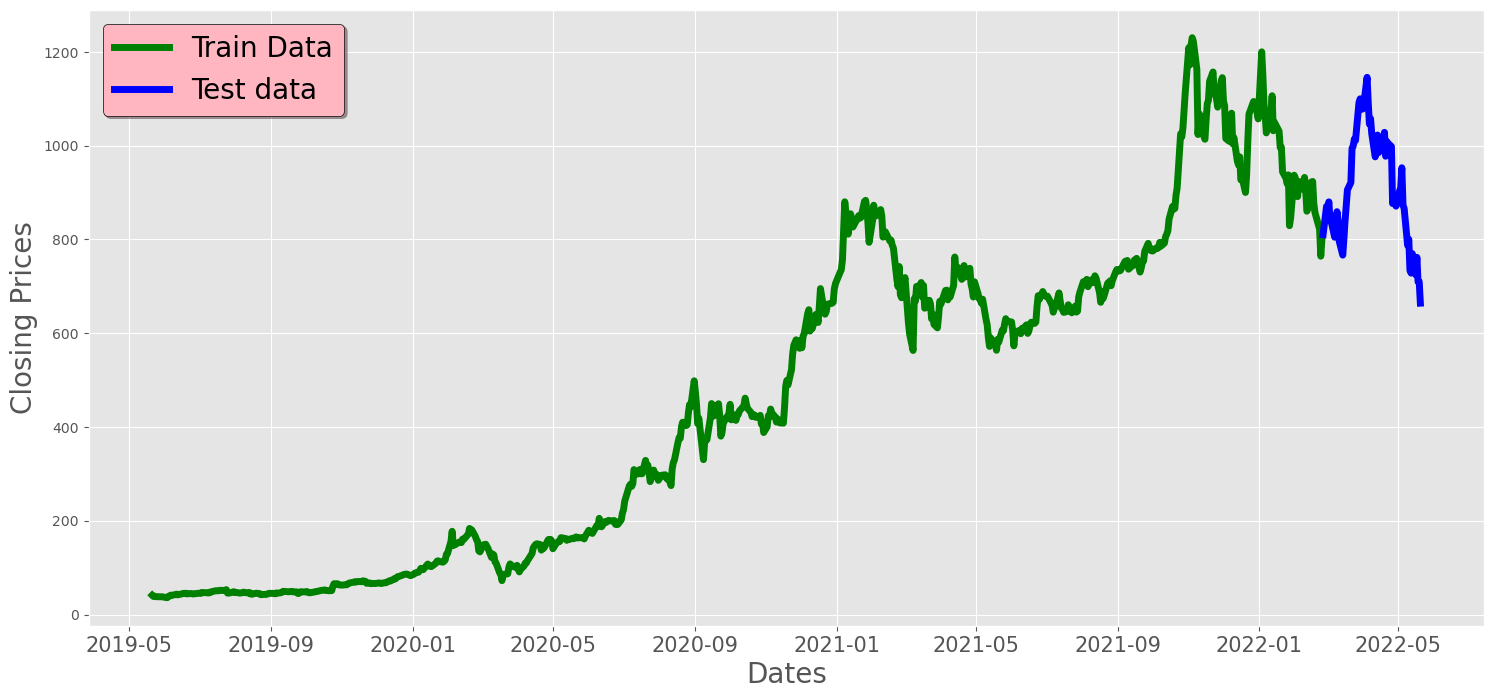

In [59]:
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.ylabel("Closing Prices",fontsize=20)
plt.xticks(fontsize=15)
plt.plot(train_data,'green',label="Train Data",linewidth =5)
plt.plot(test_data,'blue',label="Test data",linewidth=5)
plt.legend(fontsize =20,shadow =True,facecolor='lightpink',edgecolor='k')

# Model Building

In [60]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
history=[x for x in train_data]

In [62]:
model=ARIMA(history,order=(1,1,1))

In [63]:
model=model.fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 26 Jun 2025   AIC                           6306.700
Time:                        22:40:26   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
model.forecast()[0]

800.2043828204734

In [66]:
test_data[0]

C:\Users\vishn\AppData\Local\Temp\ipykernel_4440\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


809.8699951171875

In [67]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\vishn\AppData\Local\Temp\ipykernel_4440\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


93.4240610703914

In [68]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\vishn\AppData\Local\Temp\ipykernel_4440\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


9.66561229671413

In [69]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [73]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse  < best_score:
                        best_score,best_cfg = rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))
    

In [74]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=176.866
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.629
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [75]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.43992597460807


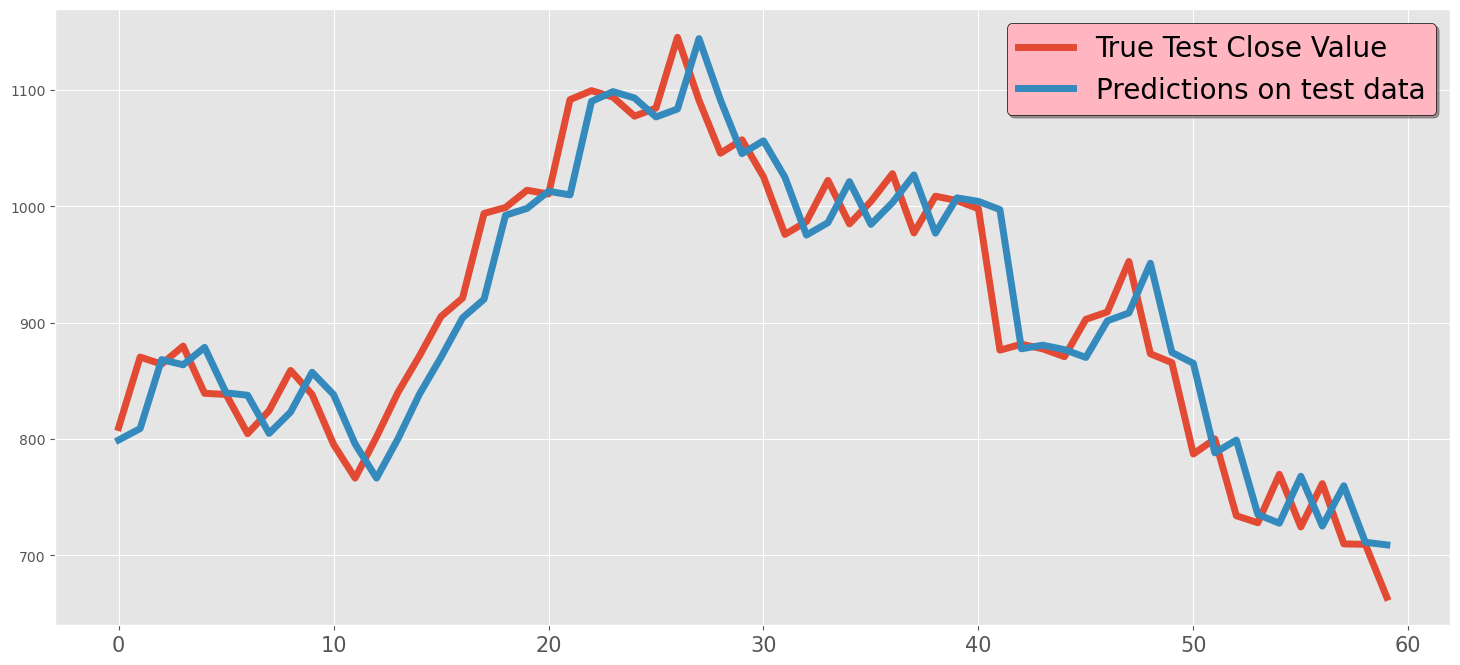

In [76]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [77]:
fc_series = pd.Series(predictions, index=test_data.index)

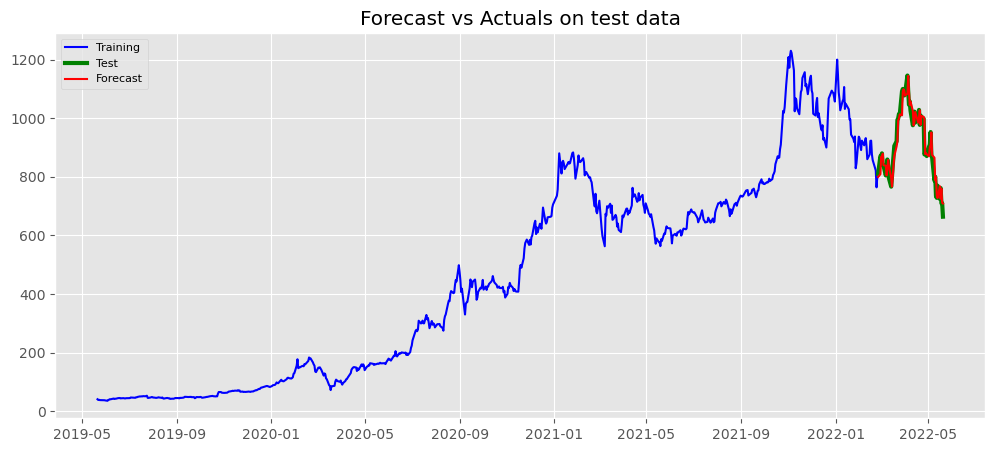

In [78]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

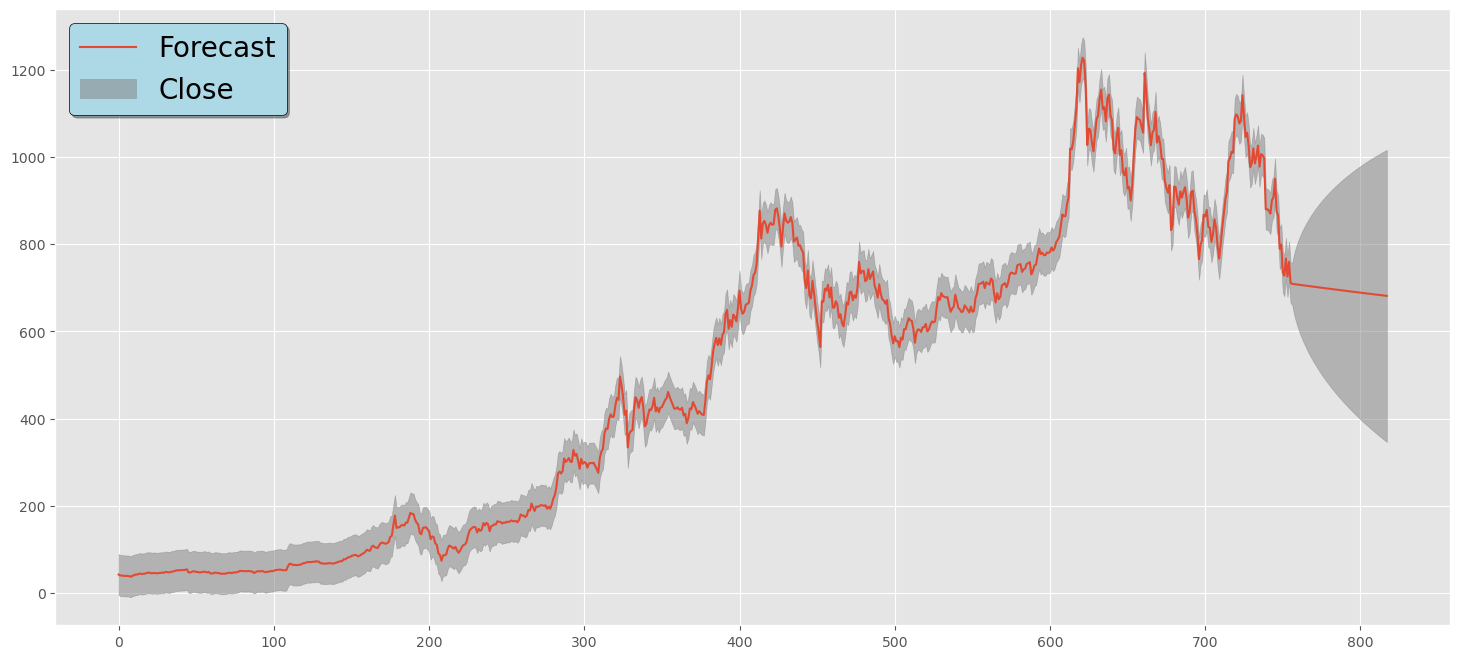

In [79]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [80]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948187497534


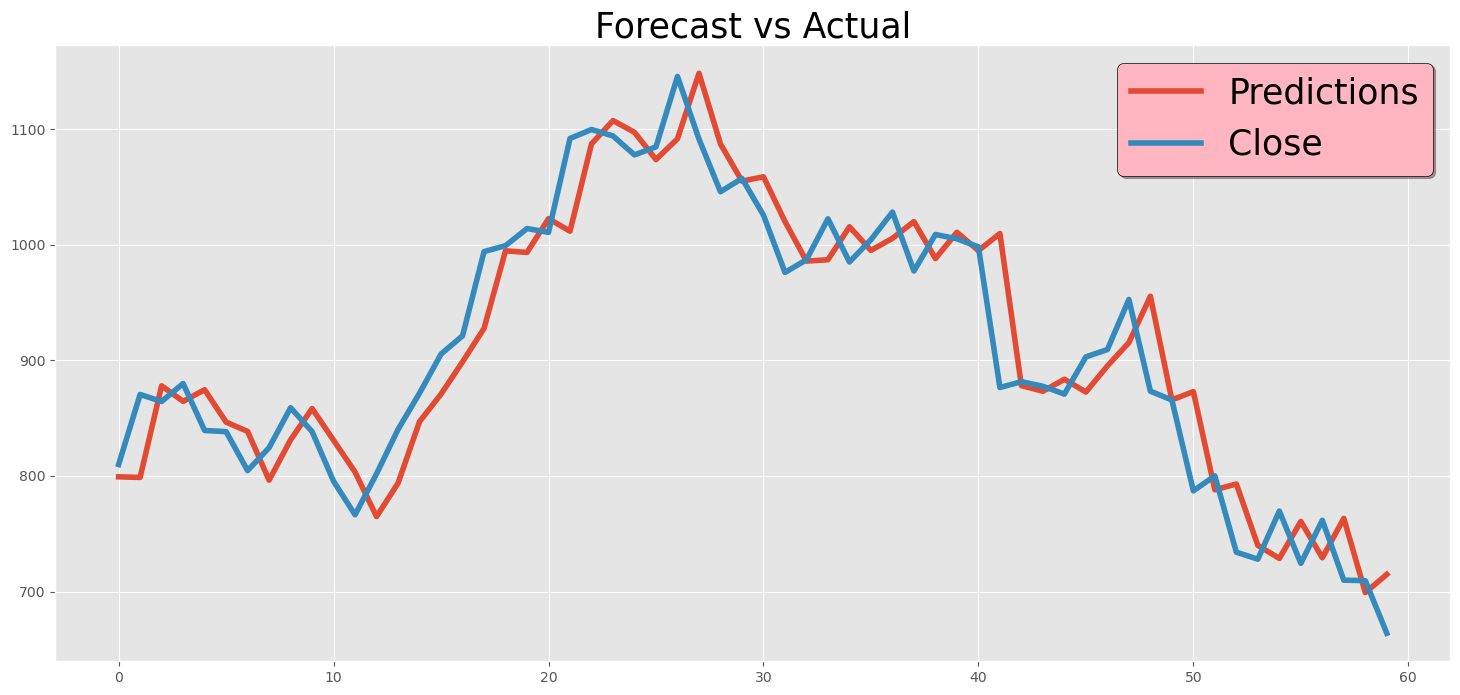

In [81]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')